In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.style.use('plotting.mplstyle')
import numpy as np
np.random.seed(15)
import h5py
import sys
sys.path.append('./../code/')
from utilities import massModel

In [2]:
# Load AR results
precomputed_data = h5py.File("./../data/ar_Xeff_Xp_summary.hdf","r")
Xeffs = precomputed_data['posterior/Xeffs'][()]
Xps = precomputed_data['posterior/Xps'][()]
dR_dXeffs = precomputed_data['posterior/dR_dXeffs'][()]
dR_dXps = precomputed_data['posterior/dR_dXps'][()]
f_Xeffs = precomputed_data['posterior/f_Xeffs'][()]
f_Xps = precomputed_data['posterior/f_Xps'][()]
R_ref = precomputed_data['posterior/R_ref'][()]
alpha = precomputed_data['posterior/alpha'][()]
mu_m1 = precomputed_data['posterior/mu_m1'][()]
sig_m1 = precomputed_data['posterior/sig_m1'][()]
log_f_peak = precomputed_data['posterior/log_f_peak'][()]
mMin = precomputed_data['posterior/mMin'][()]
mMax = precomputed_data['posterior/mMax'][()]
log_dmMin = precomputed_data['posterior/log_dmMin'][()]
log_dmMax = precomputed_data['posterior/log_dmMax'][()]

# Construct normalized probability distributions
p_Xeff = f_Xeffs/np.trapz(f_Xeffs,Xeffs,axis=0)
p_Xp = f_Xps/np.trapz(f_Xps,Xps,axis=0)

## 1. Plot AR results

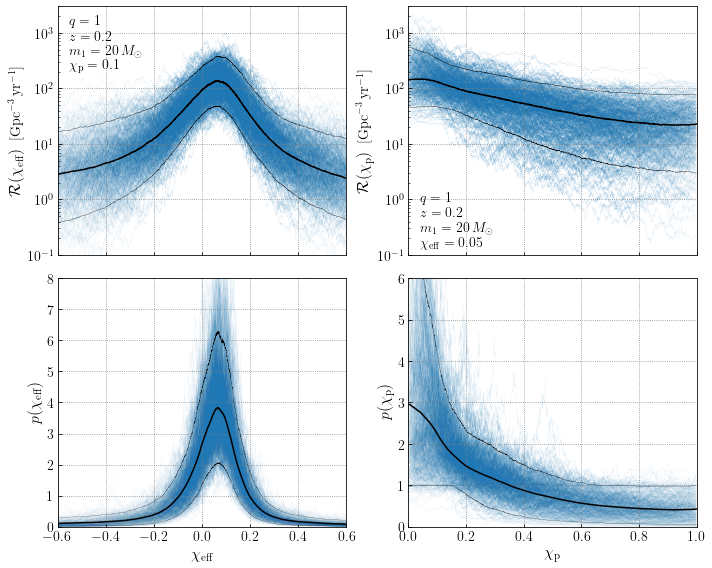

In [3]:
####################################
# Plot merger rate vs. chi-effective
####################################

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221)
ax.set_rasterization_zorder(1)

# Plot random subset of traces
for i in np.random.choice(range(dR_dXeffs.shape[1]),size=500,replace=False):                 
    ax.plot(Xeffs,dR_dXeffs[:,i],color='#1f78b4',alpha=0.2,lw=0.15,zorder=0)
    
ax.plot(Xeffs,np.median(dR_dXeffs,axis=1),color='black')
ax.plot(Xeffs,np.quantile(dR_dXeffs,0.05,axis=1),color='black',lw=0.3)
ax.plot(Xeffs,np.quantile(dR_dXeffs,0.95,axis=1),color='black',lw=0.3)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(-0.6,0.6)
ax.set_ylim(1e-1,3e3)
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_ylabel(r'$\mathcal{R}(\chi_\mathrm{eff})$ \,{\Large[$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}$]}',fontsize=16)

# Annotate with reference values
ax.text(0.04,0.94,r'$q=1$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.04,0.88,r'$z=0.2$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.04,0.82,r'$m_1=20\,M_\odot$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.04,0.76,r'$\chi_\mathrm{p}=0.1$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)

############################
# Plot merger rate vs. chi-p
############################

ax = fig.add_subplot(222)
ax.set_rasterization_zorder(1)

# Random subset of samples
for i in np.random.choice(range(dR_dXps.shape[1]),size=500,replace=False):                 
    ax.plot(Xps,dR_dXps[:,i],color='#1f78b4',alpha=0.2,lw=0.2,zorder=0)
    
ax.plot(Xps,np.median(dR_dXps,axis=1),color='black')
ax.plot(Xps,np.quantile(dR_dXps,0.05,axis=1),color='black',lw=0.3)
ax.plot(Xps,np.quantile(dR_dXps,0.95,axis=1),color='black',lw=0.3)

ax.tick_params(labelsize=14)
ax.set_xlim(0,1)
ax.set_ylim(1e-1,3e3)
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_ylabel(r'$\mathcal{R}(\chi_\mathrm{p})$ \,{\Large[$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}$]}',fontsize=16)

ax.text(0.04,0.23,r'$q=1$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.04,0.17,r'$z=0.2$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.04,0.11,r'$m_1=20\,M_\odot$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.04,0.05,r'$\chi_\mathrm{eff} = 0.05$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)

###########################################
# Probability distribution of chi-effective
###########################################

ax = fig.add_subplot(223)
ax.set_rasterization_zorder(1)

for i in np.random.choice(range(p_Xeff.shape[1]),size=500,replace=False):                 
    ax.plot(Xeffs,p_Xeff[:,i],color='#1f78b4',alpha=0.1,lw=0.1,zorder=0)
    
ax.plot(Xeffs,np.mean(p_Xeff,axis=1),color='black')
ax.plot(Xeffs,np.quantile(p_Xeff,0.05,axis=1),color='black',lw=0.2)
ax.plot(Xeffs,np.quantile(p_Xeff,0.95,axis=1),color='black',lw=0.2)

ax.tick_params(labelsize=14)
ax.set_xlim(-0.6,0.6)
ax.set_ylim(0,8)

ax.set_xlabel('$\chi_\mathrm{eff}$',fontsize=16)
ax.set_ylabel(r'$p(\chi_\mathrm{eff})$',fontsize=16)

###################################
# Probability distribution of chi-p
###################################

ax = fig.add_subplot(224)
ax.set_rasterization_zorder(1)

for i in np.random.choice(range(p_Xp.shape[1]),size=500,replace=False):                 
    ax.plot(Xps,p_Xp[:,i],color='#1f78b4',alpha=0.2,lw=0.1,zorder=0)
    
ax.plot(Xps,np.mean(p_Xp,axis=1),color='black')
ax.plot(Xps,np.quantile(p_Xp,0.05,axis=1),color='black',lw=0.2)
ax.plot(Xps,np.quantile(p_Xp,0.95,axis=1),color='black',lw=0.2)

ax.tick_params(labelsize=14)
ax.set_xlim(0,1)
ax.set_ylim(0,6)

ax.set_xlabel('$\chi_\mathrm{p}$',fontsize=16)
ax.set_ylabel(r'$p(\chi_\mathrm{p})$',fontsize=16)

plt.tight_layout()
plt.savefig('figure_12.pdf',bbox_inches='tight',dpi=200)
plt.show()

## 2. Calculate summary statistics related to effective spin distributions

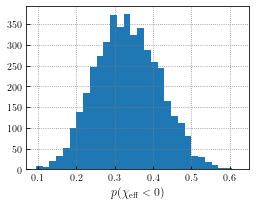

In [4]:
# First, compute the integrated probability over negative effective spins
# Find the index most closely corresponding to Xeff=0
ind_Xeff_zero = np.argmin(np.abs(Xeffs-0.0))

# Get total integrated probability below zero
p_neg = np.trapz(p_Xeff[:ind_Xeff_zero,:],Xeffs[:ind_Xeff_zero],axis=0)

fig,ax = plt.subplots()
ax.hist(p_neg,bins=30)
ax.set_xlabel('$p(\chi_\mathrm{eff}<0)$')
plt.show()

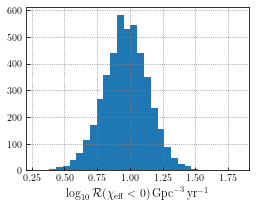

In [5]:
# Next, get integrated merger rate of events with negative effective spins

R_neg = np.zeros(R_ref.size)
for i in range(R_ref.size):
    
    # To get a total rate, we will need to integrate over mass degrees of freedom
    # First compute the variation in the merger rate over mass
    m1_grid = np.linspace(2,100.,500)
    f_m1 = massModel(m1_grid,
                     alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                     10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1_norm = massModel(20.,
                     alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                     10.**log_dmMax[i],10.**log_dmMin[i])
    
    # Integrate over mass
    int_m1 = np.trapz(f_m1/f_m1_norm,m1_grid)
    
    # Also integrate over chi_p dimension
    int_Xp = np.trapz(f_Xps[:,i],Xps)
    
    # Finally, integrate over negative effective spins
    negative_Xeff = Xeffs<0
    int_neg = np.trapz(f_Xeffs[negative_Xeff,i],Xeffs[negative_Xeff])
        
    # Put all our ingredients together to get a total merger rate!
    R_neg[i] = R_ref[i]*int_m1*int_Xp*int_neg
    
fig,ax = plt.subplots()
ax.hist(np.log10(R_neg),bins=30)
ax.set_xlabel('$\log_{10}\mathcal{R}(\chi_\mathrm{eff}<0)\,\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}$')
plt.show()

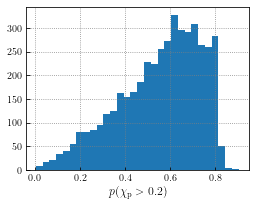

In [6]:
# And the percentage of BBHs with at least "moderate" chi_p>0.2

ind_Xp_02 = np.argmin(np.abs(Xps-0.2))
p_Xp_large = np.trapz(p_Xp[ind_Xp_02:,:],Xps[ind_Xp_02:],axis=0)

fig,ax = plt.subplots()
ax.hist(p_Xp_large,bins=30)
ax.set_xlabel('$p(\chi_\mathrm{p}>0.2)$')
plt.show()

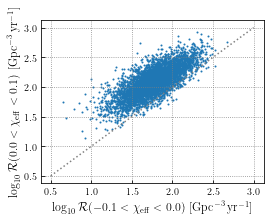

In [7]:
# Roughly evaluate symmetry (or lack thereof) in the chi-effective distribution about zero
# Do so by comparing integrated merger rates in the (-0.1,0.) and (0.,0.1) intervals

# Find indices most closely matching our three chi-eff values of interest
ind_Xeff_n01 = np.argmin(np.abs(Xeffs+0.1))
ind_Xeff_00 = np.argmin(np.abs(Xeffs-0.0))
ind_Xeff_01 = np.argmin(np.abs(Xeffs-0.1))

# Get total merger rates across both intervals
R_Xeff_n01_to_Xeff_00 = np.trapz(dR_dXeffs[ind_Xeff_n01:ind_Xeff_00,:],Xeffs[ind_Xeff_n01:ind_Xeff_00],axis=0)/0.1
R_Xeff_00_to_Xeff_01 = np.trapz(dR_dXeffs[ind_Xeff_00:ind_Xeff_01,:],Xeffs[ind_Xeff_00:ind_Xeff_01],axis=0)/0.1

# Find fraction with larger integrated merger rates in (0.,0.1) than in (-0.1,0.)
significance_Xeff_asymmetry = R_Xeff_00_to_Xeff_01[R_Xeff_00_to_Xeff_01>R_Xeff_n01_to_Xeff_00].size/R_Xeff_00_to_Xeff_01.size

fig,ax = plt.subplots()
ax.scatter(np.log10(R_Xeff_n01_to_Xeff_00),np.log10(R_Xeff_00_to_Xeff_01),s=1)
ax.plot([0.5,3.],[0.5,3],color='grey',ls=':')
ax.set_xlabel('$\log_{10}\mathcal{R}(-0.1<\chi_\mathrm{eff}<0.0)\,\,[\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}]$')
ax.set_ylabel('$\log_{10}\mathcal{R}(0.0<\chi_\mathrm{eff}<0.1)\,\,[\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}]$')
plt.show()

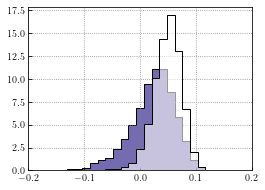

In [8]:
# Finally compute estimates of median and mean Xeffs across the population

# Loop across posterior samples to compute medians
median_Xeff = np.zeros(dR_dXeffs.shape[1])
for i in range(p_Xeff.shape[1]):
    
    # Construct CDF and interpolate to find median
    cdf_Xeff = np.cumsum(p_Xeff[:-1,i]*np.diff(Xeffs))
    median_Xeff[i] = np.interp(0.5,cdf_Xeff,Xeffs[:-1])

mean_Xeff = np.trapz(Xeffs[:,np.newaxis]*p_Xeff[:,:],Xeffs,axis=0)

fig,ax = plt.subplots()
ax.hist(mean_Xeff,density=True,bins=np.linspace(-0.2,0.2,30),color='#756bb1',histtype='stepfilled',zorder=1)
ax.hist(mean_Xeff,density=True,bins=np.linspace(-0.2,0.2,30),color='black',histtype='step',zorder=1)
ax.hist(median_Xeff,density=True,bins=np.linspace(-0.2,0.2,30),color='white',histtype='stepfilled',alpha=0.6,zorder=2)
ax.hist(median_Xeff,density=True,bins=np.linspace(-0.2,0.2,30),color='black',histtype='step',zorder=2)
ax.set_xlim(-0.2,0.2)
plt.show()

## 3. Save latex macros

In [9]:
with open('./../macros/effective_spin_percentiles.txt','w') as macrofile:
    
    macrofile.write("\\newcommand{{\\ChiEffPercentNegative}}{{{0:.0f}^{{+{1:.0f}}}_{{-{2:.0f}}}\\%}}".format(\
        100.*np.median(p_neg),
        100.*np.quantile(p_neg,0.95) - 100.*np.median(p_neg),
        100.*np.median(p_neg) - 100.*np.quantile(p_neg,0.05)))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\ChiEffRateNegative}}{{{0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}}}".format(\
        np.median(R_neg),
        np.quantile(R_neg,0.95) - np.median(R_neg),
        np.median(R_neg) - np.quantile(R_neg,0.05)))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\ChiPPercentLarge}}{{{0:.0f}^{{+{1:.0f}}}_{{-{2:.0f}}}\\%}}".format(\
        100.*np.median(p_Xp_large),
        100.*np.quantile(p_Xp_large,0.95) - 100.*np.median(p_Xp_large),
        100.*np.median(p_Xp_large) - 100.*np.quantile(p_Xp_large,0.05)))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\ChiEffAsymmetricPercentage}}{{{0:.1f}\\%}}".format(\
        100.*significance_Xeff_asymmetry))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\ChiEffMedianPercentPositive}}{{{0:.1f}\\%}}".format(\
        100.*median_Xeff[median_Xeff>0.].size/median_Xeff.size))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\ChiEffMeanPercentPositive}}{{{0:.1f}\\%}}".format(\
        100.*mean_Xeff[mean_Xeff>0.].size/mean_Xeff.size))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\ChiEffMean}}{{{0:.2f}^{{+{1:.2f}}}_{{-{2:.2f}}}}}".format(\
        np.median(mean_Xeff),
        np.quantile(mean_Xeff,0.95) - np.median(mean_Xeff),
        np.median(mean_Xeff) - np.quantile(mean_Xeff,0.05)))
    macrofile.write("\n")